## Download the data

In [1]:
!wget --header="Host: doc-14-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://drive.google.com/uc?id=1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN&export=download" --header="Cookie: AUTH_j3go1ceeg08tu2h23vvnnksqb3ngj2va=01843316027174180138|1558929600000|5v26b0bvqq6ps2vq0ir96d3b3vts3nh6" --header="Connection: keep-alive" "https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download" -O "train.zip" -c

--2019-05-29 03:54:17--  https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download
Resolving doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)... 172.217.160.193, 2404:6800:4009:80b::2001
Connecting to doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)|172.217.160.193|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-05-29 03:54:18 ERROR 403: Forbidden.



In [2]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv" -O "test_ApKoW4T.csv" -c

--2019-05-27 04:30:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074 (31K) [text/csv]
Saving to: ‘test_ApKoW4T.csv’

test_ApKoW4T.csv    100%[===================>]  31.32K  --.-KB/s    in 0.004s  

2019-05-27 04:30:01 (7.88 MB/s) - ‘test_ApKoW4T.csv’ saved [32074/32074]



In [3]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv" -O "sample_submission_ns2btKE.csv" -c

--2019-05-27 04:30:19--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37443 (37K) [text/csv]
Saving to: ‘sample_submission_ns2btKE.csv’

sample_submission_n 100%[===================>]  36.57K  --.-KB/s    in 0.004s  

2019-05-27 04:30:19 (9.64 MB/s) - ‘sample_submission_ns2btKE.csv’ saved [37443/37443]



In [ ]:
!unzip train.zip -d data/

## Exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
#import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
PATH=Path('data/')

In [118]:
os.listdir(PATH)

['test_ApKoW4T.csv',
 'images',
 'models',
 'sample_submission_ns2btKE.csv',
 'test_resized',
 'train.csv',
 'train_resized',
 '.ipynb_checkpoints',
 'test',
 'rn50-stage3-history.csv',
 'rn50-stage1-history.csv',
 'rn50-stage4-history.csv',
 'rn50-stage2-history.csv']

In [4]:
df_train=pd.read_csv(PATH/'train.csv')

In [5]:
df_train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
df_train.dtypes

image       object
category     int64
dtype: object

In [7]:
df_test=pd.read_csv(PATH/'test_ApKoW4T.csv')

In [8]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [9]:
len(os.listdir(PATH/'images'))

6252

In [10]:
len(df_train),len(df_test),len(df_train)+len(df_test)

(6252, 2680, 8932)

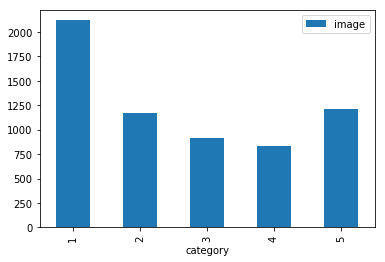

In [11]:
df_train.groupby('category').count().plot(kind='bar')

## Move the files to test folder

In [28]:
os.makedirs(PATH/'test',exist_ok=True)

In [61]:
test_img=[]
for i in range(len(df_test)):
    test_img.append(df_test.image.loc[i])

In [60]:
path = f'{PATH}/images/'
moveto = f'{PATH}/test/'
#files = test_pos
#files.sort()
for f in test_img:
    #print(str(f))
    src = path+f
    dst = moveto+f
   # print(f)
    shutil.move(src,dst)

In [13]:
len(os.listdir(path)),len(os.listdir(moveto))

NameError: name 'path' is not defined

In [12]:
PATH/'images'

PosixPath('data/images')

In [13]:
PATH

PosixPath('data')

## For train images

In [15]:
size_d={k: PIL.Image.open(PATH/'images'/k).size for k in os.listdir(PATH/'images')}

In [16]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

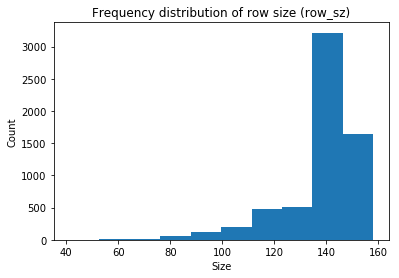

In [17]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

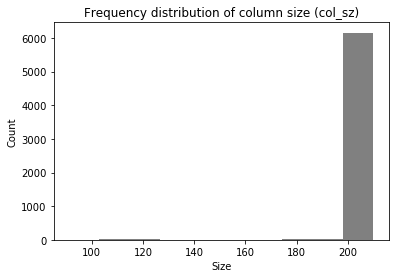

In [18]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [19]:
PATH

PosixPath('data')

In [20]:
# Let us resize it column =150 and row=210
def resize_img(file):
    os.makedirs(PATH/'train_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/images/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/train_resized/'+file,resized)

In [21]:
for img in os.listdir(PATH/'images'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None    

## For test images

In [23]:
size_d={k: PIL.Image.open(PATH/'test'/k).size for k in os.listdir(PATH/'test/')}

In [24]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

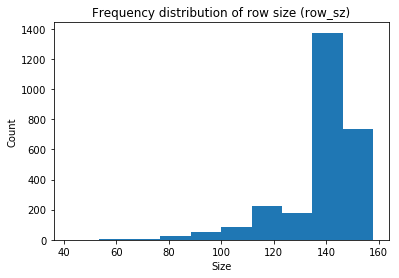

In [25]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

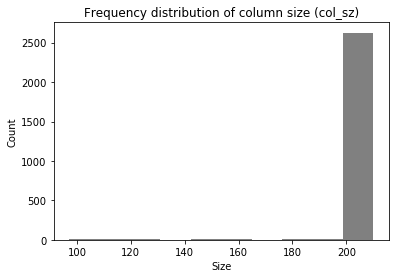

In [26]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [27]:
# Test images are of similar distribution, let us resize
# Let us resize it column =210 and row=150
def resize_img(file):
    os.makedirs(PATH/'test_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/test/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/test_resized/'+file,resized)


In [28]:
for img in os.listdir(PATH/'test'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None  

In [55]:
len(os.listdir(PATH/'train_resized'))

6252

## Create Data block (Try with half size)

In [4]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [5]:
img=open_image(PATH/'train_resized'/os.listdir(PATH/'train_resized')[1])

In [6]:
img.shape

torch.Size([3, 150, 210])

In [7]:
src_size=np.array(img.shape[1:]);src_size

array([150, 210])

In [8]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [17]:
'''
train_il = ImageList.from_df(df=df_train, cols='image', path=PATH/'train_resized')
test_il = ImageList.from_df(df=df_test, cols='image', path=PATH/'test_resized')

In [87]:
'''
np.random.seed(42)
src = (train_il
        .split_by_rand_pct(0.2)
        .label_from_df(cols='category')
        .add_test(test_il))

In [42]:
'''
np.random.seed(42)
src = (ImageList.from_df(df=df_train, cols='image', path=PATH/'images')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='category')
      .add_test_folder('test_resized'))

In [9]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=256).normalize(imagenet_stats))

In [10]:
data.classes

['1', '2', '3', '4', '5']

In [13]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: data

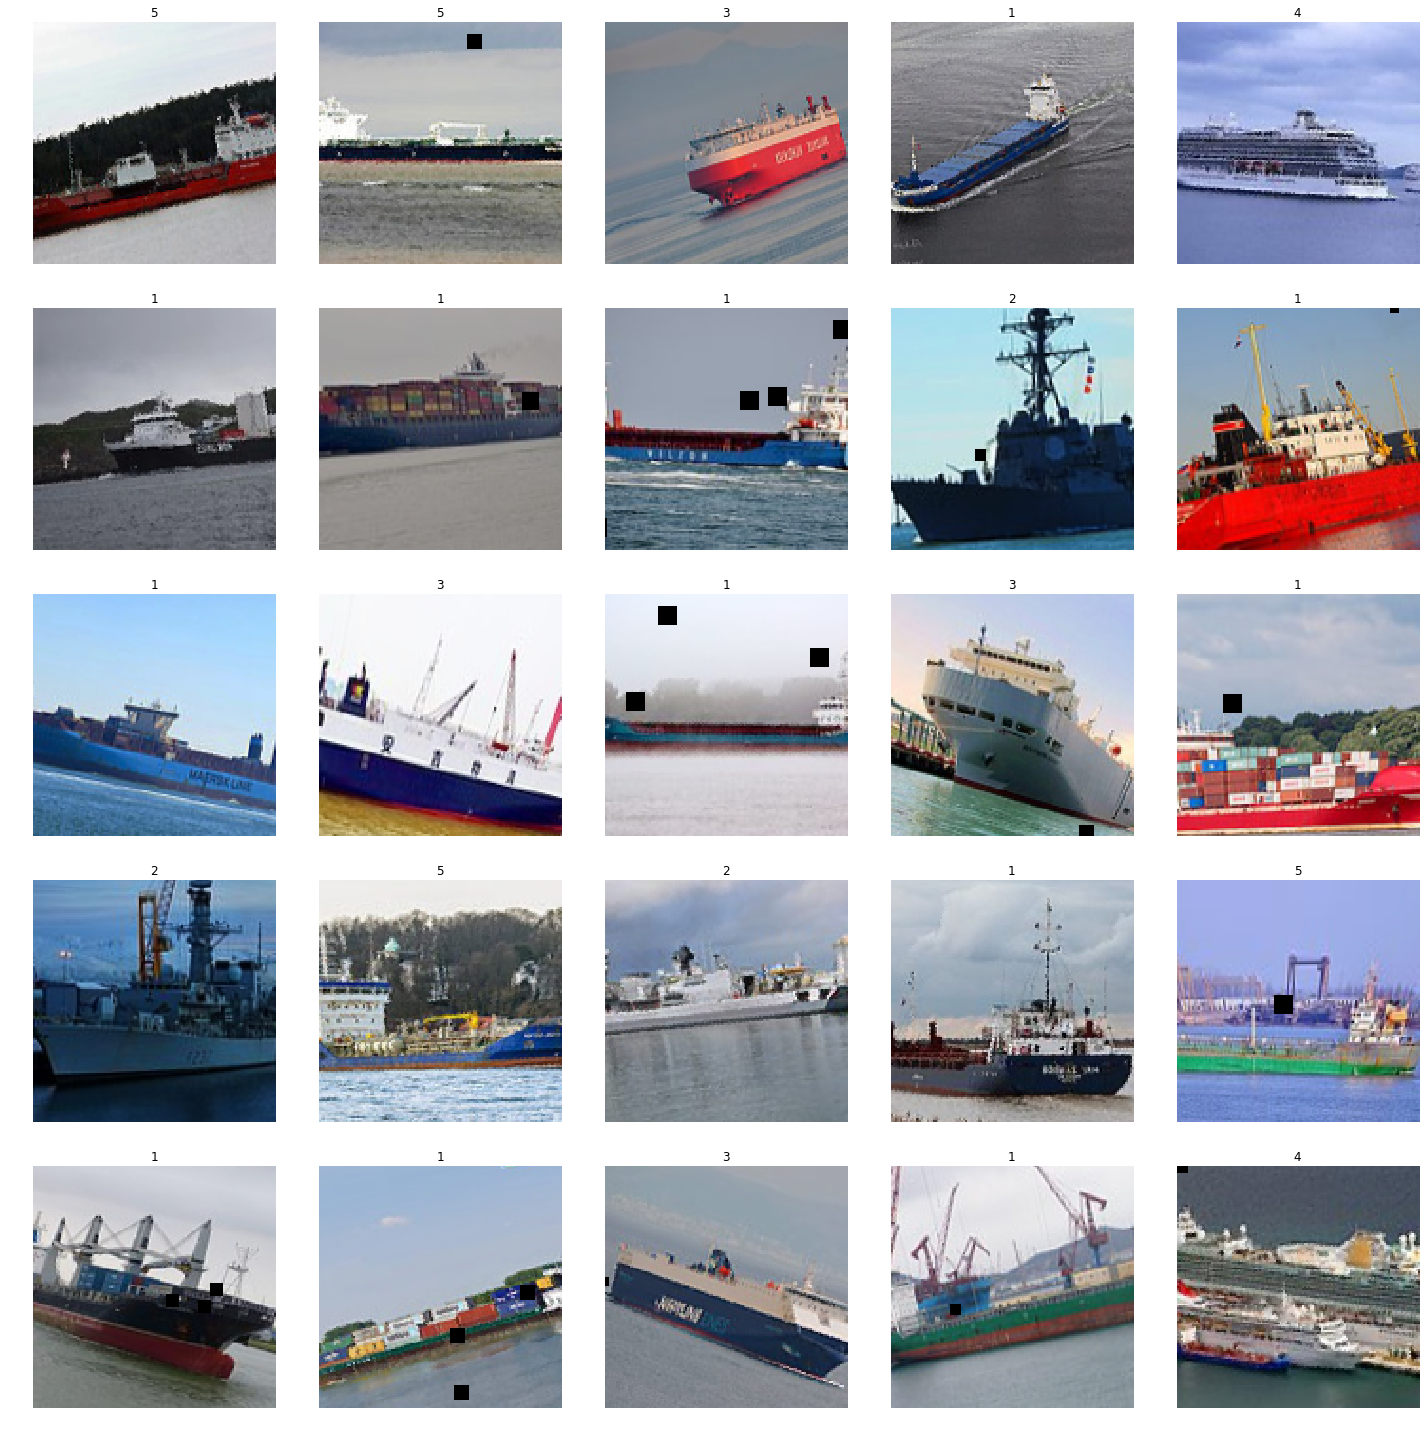

In [14]:
data.show_batch()

## Try with ResNET 101

In [91]:
#f1 = partial(fbeta, thresh=0.2, beta = 1)

In [10]:
metrics_custom=[fbeta,accuracy_thresh]

In [11]:
learn=cnn_learner(data,models.resnet101,metrics=metrics_custom)

In [13]:
stage1_rn101_call_back=[CSVLogger(learn=learn, filename='rn101-praug-stage1-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=3),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn101-praug_best_stage-1-aug'),
                          PeakMemMetric(learn)]

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


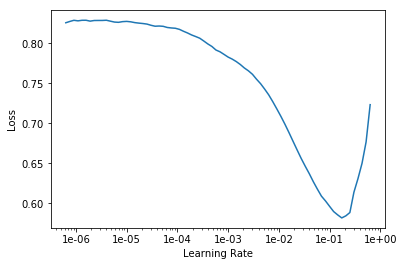

In [15]:
learn.recorder.plot()

In [16]:
lr=3e-2

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.303644,0.260966,0.798514,0.889120,0,0,48,8252,00:07
1,0.272061,0.239506,0.810057,0.901120,0,0,0,6216,00:07
2,0.247002,0.202219,0.837162,0.919840,0,0,0,6216,00:07
3,0.222768,0.177756,0.856076,0.923680,0,0,0,6216,00:07
4,0.202096,0.169106,0.870552,0.932000,0,0,0,6216,00:07
5,0.184064,0.152202,0.888800,0.936160,0,0,0,6216,00:07
6,0.165496,0.143012,0.885567,0.942400,0,0,0,6216,00:07
7,0.149754,0.172845,0.862381,0.932960,0,0,0,6216,00:07
8,0.136007,0.156859,0.883562,0.939040,0,0,0,6216,00:07


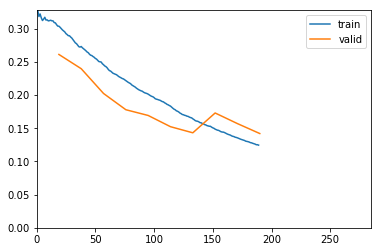

Better model found at epoch 0 with fbeta value: 0.7985142469406128.
Better model found at epoch 1 with fbeta value: 0.8100571632385254.
Better model found at epoch 2 with fbeta value: 0.8371618986129761.
Better model found at epoch 3 with fbeta value: 0.856076180934906.
Better model found at epoch 4 with fbeta value: 0.8705523610115051.
Better model found at epoch 5 with fbeta value: 0.8888000249862671.
Epoch 9: early stopping


AttributeError: 'NoneType' object has no attribute 'mixup'

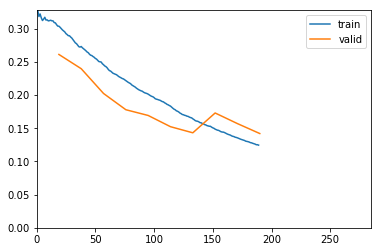

In [19]:
learn.fit_one_cycle(15,slice(lr),callbacks=stage1_rn101_call_back).mixup().to_f16()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.091008,0.138479,0.893010,0.949280,0,0,48,6156,00:07
1,0.096100,0.154809,0.884705,0.944480,0,0,0,6144,00:07
2,0.099275,0.174243,0.869105,0.937600,0,0,0,6144,00:07
3,0.094866,0.129183,0.902838,0.952320,0,0,0,6144,00:07
4,0.087808,0.131607,0.902324,0.951040,0,0,0,6144,00:07


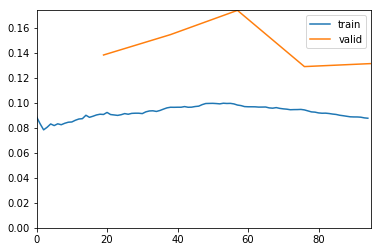

Better model found at epoch 0 with fbeta value: 0.8930095434188843.
Better model found at epoch 3 with fbeta value: 0.9028381109237671.


AttributeError: 'NoneType' object has no attribute 'mixup'

In [21]:
learn.fit_one_cycle(5,slice(lr),callbacks=stage1_rn101_call_back).mixup().to_f16()

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


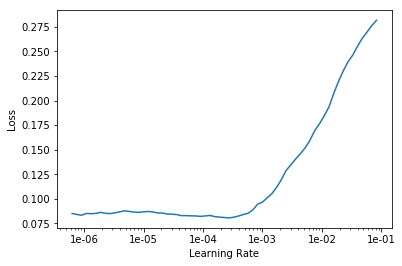

In [24]:
learn.recorder.plot()

In [25]:
learn.load('rn101-praug_best_stage-1-aug')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

In [26]:
lr=1e-4

In [27]:
stage2_rn101_call_back=[CSVLogger(learn=learn, filename='rn101-praug-stage2-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn101-praug_best_stage-2-aug'),
                          PeakMemMetric(learn)]

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.112567,0.279841,0.830533,0.921120,0,0,4976,2058,00:08
1,0.125209,0.389496,0.762514,0.888640,0,0,48,4490,00:08
2,0.137457,0.811947,0.728610,0.884160,0,0,0,4550,00:08
3,0.151616,0.326182,0.817733,0.917760,0,0,0,4550,00:08
4,0.149450,0.268191,0.808152,0.916000,0,0,0,4550,00:08
5,0.141554,0.186630,0.864172,0.933760,0,0,0,4550,00:08
6,0.136575,0.176703,0.870590,0.937920,0,0,0,4550,00:09
7,0.127642,0.173304,0.879848,0.934080,0,0,0,4550,00:08
8,0.117639,0.185498,0.868914,0.927680,0,0,0,4550,00:09
9,0.104717,0.150696,0.896838,0.948800,0,0,0,4550,00:09


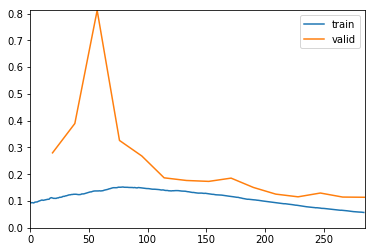

Better model found at epoch 0 with fbeta value: 0.8305333852767944.
Better model found at epoch 5 with fbeta value: 0.8641715049743652.
Better model found at epoch 6 with fbeta value: 0.8705904483795166.
Better model found at epoch 7 with fbeta value: 0.8798476457595825.
Better model found at epoch 9 with fbeta value: 0.8968380689620972.
Better model found at epoch 10 with fbeta value: 0.9133142828941345.
Better model found at epoch 11 with fbeta value: 0.9169332981109619.
Better model found at epoch 14 with fbeta value: 0.920038104057312.


AttributeError: 'NoneType' object has no attribute 'mixup'

In [28]:
learn.fit_one_cycle(15,slice(lr,3e-2),callbacks=stage2_rn101_call_back).mixup().to_f16()

## Pass full size image

In [12]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [30]:
learn=learn.load('rn101-praug_best_stage-2-aug')

In [61]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 38, 53]         0          False     
______________________________________________________________________
Conv2d               [64, 38, 53]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 38, 53]         128        True      
______________________________________________________________________
Conv2d               [64, 38, 53]         36,864     True      
______________________________________________________________

In [31]:
learn.freeze()

In [63]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 38, 53]         0          False     
______________________________________________________________________
Conv2d               [64, 38, 53]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 38, 53]         128        True      
______________________________________________________________________
Conv2d               [64, 38, 53]         36,864     False     
______________________________________________________________

In [13]:
learn.data=data

In [33]:
learn.data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [66]:
learn.metrics

[<function fastai.metrics.fbeta(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.2, beta:float=2, eps:float=1e-09, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fcdf6d50ea0>>,
 <function fastai.metrics.accuracy_thresh(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.5, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fcdf6d50ea0>>]

In [34]:
stage3_rn101_call_back=[CSVLogger(learn=learn, filename='rn101-praug-stage3-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn101-praug_best_stage-3-aug'),
                          PeakMemMetric(learn)]

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


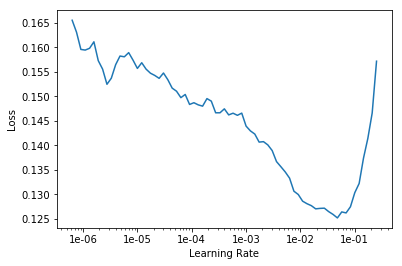

In [36]:
learn.recorder.plot()

In [37]:
lr=4e-3

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.153102,0.159726,0.884914,0.940160,0,0,148,11704,00:18
1,0.132089,0.127290,0.902019,0.950720,0,0,2,11722,00:17
2,0.115282,0.109764,0.919295,0.957280,0,0,0,11724,00:17
3,0.096975,0.106063,0.920552,0.957920,0,0,0,11724,00:17
4,0.083902,0.096219,0.927409,0.964960,0,0,0,11724,00:16
5,0.073826,0.092328,0.926476,0.964800,0,0,0,11724,00:17
6,0.064158,0.094348,0.928705,0.965440,0,0,0,11724,00:16
7,0.060759,0.099989,0.926705,0.964480,0,0,0,11724,00:17
8,0.057719,0.093081,0.930514,0.967040,0,0,0,11724,00:16
9,0.053950,0.096454,0.931543,0.966560,0,0,0,11724,00:17


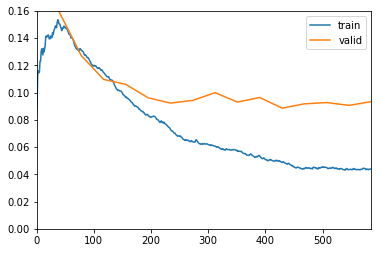

Better model found at epoch 0 with fbeta value: 0.8849142789840698.
Better model found at epoch 1 with fbeta value: 0.9020190238952637.
Better model found at epoch 2 with fbeta value: 0.9192951321601868.
Better model found at epoch 3 with fbeta value: 0.9205524325370789.
Better model found at epoch 4 with fbeta value: 0.9274094700813293.
Better model found at epoch 6 with fbeta value: 0.9287047982215881.
Better model found at epoch 8 with fbeta value: 0.9305142760276794.
Better model found at epoch 9 with fbeta value: 0.9315428733825684.
Better model found at epoch 10 with fbeta value: 0.9348761439323425.


AttributeError: 'NoneType' object has no attribute 'mixup'

In [38]:
learn.fit_one_cycle(15,slice(lr),callbacks=stage3_rn101_call_back).mixup().to_f16()

In [14]:
learn.load('rn101-praug_best_stage-3-aug')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stri

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


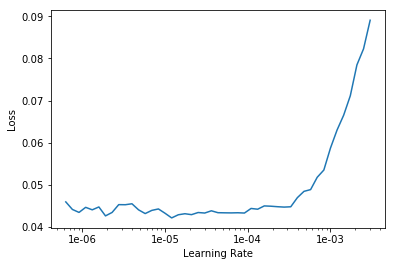

In [42]:
learn.recorder.plot()

In [15]:
lr=2e-5

In [16]:
stage4_rn101_call_back=[CSVLogger(learn=learn, filename='rn101-praug-stage4-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn101-praug_best_stage-4-aug'),
                          PeakMemMetric(learn)]

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.046201,0.092183,0.932952,0.967520,0,0,252,13594,00:20
1,0.043702,0.090506,0.933809,0.968640,0,0,0,11856,00:16
2,0.043536,0.087687,0.935181,0.968320,0,0,0,11856,00:16
3,0.043659,0.096237,0.934914,0.966560,0,0,0,11856,00:16
4,0.044288,0.096125,0.930343,0.966560,0,0,0,11856,00:17
5,0.041786,0.089461,0.934743,0.970240,0,0,0,11856,00:16
6,0.041795,0.093758,0.931714,0.967520,0,0,0,11856,00:17
7,0.039445,0.088766,0.938152,0.968640,0,0,0,11856,00:17
8,0.039225,0.087233,0.940210,0.970560,0,0,0,11856,00:17
9,0.038330,0.093004,0.935771,0.969120,0,0,0,11856,00:17


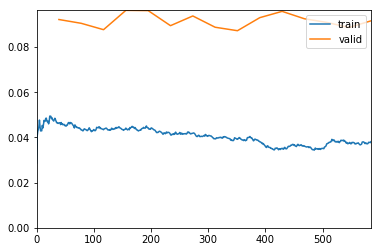

Better model found at epoch 0 with fbeta value: 0.9329524636268616.
Better model found at epoch 1 with fbeta value: 0.9338094592094421.
Better model found at epoch 2 with fbeta value: 0.9351808428764343.
Better model found at epoch 7 with fbeta value: 0.9381524324417114.
Better model found at epoch 8 with fbeta value: 0.9402095675468445.
Epoch 14: early stopping


AttributeError: 'NoneType' object has no attribute 'mixup'

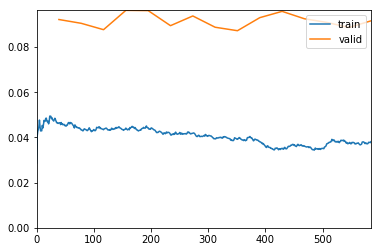

In [17]:
learn.fit_one_cycle(15,slice(lr,4e-3),callbacks=stage4_rn101_call_back).mixup().to_f16()

In [18]:
learn.load('rn50-praug_best_stage-4-aug')

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.6.6.conv1.weight", "0.6.6.bn1.weight", "0.6.6.bn1.bias", "0.6.6.bn1.running_mean", "0.6.6.bn1.running_var", "0.6.6.conv2.weight", "0.6.6.bn2.weight", "0.6.6.bn2.bias", "0.6.6.bn2.running_mean", "0.6.6.bn2.running_var", "0.6.6.conv3.weight", "0.6.6.bn3.weight", "0.6.6.bn3.bias", "0.6.6.bn3.running_mean", "0.6.6.bn3.running_var", "0.6.7.conv1.weight", "0.6.7.bn1.weight", "0.6.7.bn1.bias", "0.6.7.bn1.running_mean", "0.6.7.bn1.running_var", "0.6.7.conv2.weight", "0.6.7.bn2.weight", "0.6.7.bn2.bias", "0.6.7.bn2.running_mean", "0.6.7.bn2.running_var", "0.6.7.conv3.weight", "0.6.7.bn3.weight", "0.6.7.bn3.bias", "0.6.7.bn3.running_mean", "0.6.7.bn3.running_var", "0.6.8.conv1.weight", "0.6.8.bn1.weight", "0.6.8.bn1.bias", "0.6.8.bn1.running_mean", "0.6.8.bn1.running_var", "0.6.8.conv2.weight", "0.6.8.bn2.weight", "0.6.8.bn2.bias", "0.6.8.bn2.running_mean", "0.6.8.bn2.running_var", "0.6.8.conv3.weight", "0.6.8.bn3.weight", "0.6.8.bn3.bias", "0.6.8.bn3.running_mean", "0.6.8.bn3.running_var", "0.6.9.conv1.weight", "0.6.9.bn1.weight", "0.6.9.bn1.bias", "0.6.9.bn1.running_mean", "0.6.9.bn1.running_var", "0.6.9.conv2.weight", "0.6.9.bn2.weight", "0.6.9.bn2.bias", "0.6.9.bn2.running_mean", "0.6.9.bn2.running_var", "0.6.9.conv3.weight", "0.6.9.bn3.weight", "0.6.9.bn3.bias", "0.6.9.bn3.running_mean", "0.6.9.bn3.running_var", "0.6.10.conv1.weight", "0.6.10.bn1.weight", "0.6.10.bn1.bias", "0.6.10.bn1.running_mean", "0.6.10.bn1.running_var", "0.6.10.conv2.weight", "0.6.10.bn2.weight", "0.6.10.bn2.bias", "0.6.10.bn2.running_mean", "0.6.10.bn2.running_var", "0.6.10.conv3.weight", "0.6.10.bn3.weight", "0.6.10.bn3.bias", "0.6.10.bn3.running_mean", "0.6.10.bn3.running_var", "0.6.11.conv1.weight", "0.6.11.bn1.weight", "0.6.11.bn1.bias", "0.6.11.bn1.running_mean", "0.6.11.bn1.running_var", "0.6.11.conv2.weight", "0.6.11.bn2.weight", "0.6.11.bn2.bias", "0.6.11.bn2.running_mean", "0.6.11.bn2.running_var", "0.6.11.conv3.weight", "0.6.11.bn3.weight", "0.6.11.bn3.bias", "0.6.11.bn3.running_mean", "0.6.11.bn3.running_var", "0.6.12.conv1.weight", "0.6.12.bn1.weight", "0.6.12.bn1.bias", "0.6.12.bn1.running_mean", "0.6.12.bn1.running_var", "0.6.12.conv2.weight", "0.6.12.bn2.weight", "0.6.12.bn2.bias", "0.6.12.bn2.running_mean", "0.6.12.bn2.running_var", "0.6.12.conv3.weight", "0.6.12.bn3.weight", "0.6.12.bn3.bias", "0.6.12.bn3.running_mean", "0.6.12.bn3.running_var", "0.6.13.conv1.weight", "0.6.13.bn1.weight", "0.6.13.bn1.bias", "0.6.13.bn1.running_mean", "0.6.13.bn1.running_var", "0.6.13.conv2.weight", "0.6.13.bn2.weight", "0.6.13.bn2.bias", "0.6.13.bn2.running_mean", "0.6.13.bn2.running_var", "0.6.13.conv3.weight", "0.6.13.bn3.weight", "0.6.13.bn3.bias", "0.6.13.bn3.running_mean", "0.6.13.bn3.running_var", "0.6.14.conv1.weight", "0.6.14.bn1.weight", "0.6.14.bn1.bias", "0.6.14.bn1.running_mean", "0.6.14.bn1.running_var", "0.6.14.conv2.weight", "0.6.14.bn2.weight", "0.6.14.bn2.bias", "0.6.14.bn2.running_mean", "0.6.14.bn2.running_var", "0.6.14.conv3.weight", "0.6.14.bn3.weight", "0.6.14.bn3.bias", "0.6.14.bn3.running_mean", "0.6.14.bn3.running_var", "0.6.15.conv1.weight", "0.6.15.bn1.weight", "0.6.15.bn1.bias", "0.6.15.bn1.running_mean", "0.6.15.bn1.running_var", "0.6.15.conv2.weight", "0.6.15.bn2.weight", "0.6.15.bn2.bias", "0.6.15.bn2.running_mean", "0.6.15.bn2.running_var", "0.6.15.conv3.weight", "0.6.15.bn3.weight", "0.6.15.bn3.bias", "0.6.15.bn3.running_mean", "0.6.15.bn3.running_var", "0.6.16.conv1.weight", "0.6.16.bn1.weight", "0.6.16.bn1.bias", "0.6.16.bn1.running_mean", "0.6.16.bn1.running_var", "0.6.16.conv2.weight", "0.6.16.bn2.weight", "0.6.16.bn2.bias", "0.6.16.bn2.running_mean", "0.6.16.bn2.running_var", "0.6.16.conv3.weight", "0.6.16.bn3.weight", "0.6.16.bn3.bias", "0.6.16.bn3.running_mean", "0.6.16.bn3.running_var", "0.6.17.conv1.weight", "0.6.17.bn1.weight", "0.6.17.bn1.bias", "0.6.17.bn1.running_mean", "0.6.17.bn1.running_var", "0.6.17.conv2.weight", "0.6.17.bn2.weight", "0.6.17.bn2.bias", "0.6.17.bn2.running_mean", "0.6.17.bn2.running_var", "0.6.17.conv3.weight", "0.6.17.bn3.weight", "0.6.17.bn3.bias", "0.6.17.bn3.running_mean", "0.6.17.bn3.running_var", "0.6.18.conv1.weight", "0.6.18.bn1.weight", "0.6.18.bn1.bias", "0.6.18.bn1.running_mean", "0.6.18.bn1.running_var", "0.6.18.conv2.weight", "0.6.18.bn2.weight", "0.6.18.bn2.bias", "0.6.18.bn2.running_mean", "0.6.18.bn2.running_var", "0.6.18.conv3.weight", "0.6.18.bn3.weight", "0.6.18.bn3.bias", "0.6.18.bn3.running_mean", "0.6.18.bn3.running_var", "0.6.19.conv1.weight", "0.6.19.bn1.weight", "0.6.19.bn1.bias", "0.6.19.bn1.running_mean", "0.6.19.bn1.running_var", "0.6.19.conv2.weight", "0.6.19.bn2.weight", "0.6.19.bn2.bias", "0.6.19.bn2.running_mean", "0.6.19.bn2.running_var", "0.6.19.conv3.weight", "0.6.19.bn3.weight", "0.6.19.bn3.bias", "0.6.19.bn3.running_mean", "0.6.19.bn3.running_var", "0.6.20.conv1.weight", "0.6.20.bn1.weight", "0.6.20.bn1.bias", "0.6.20.bn1.running_mean", "0.6.20.bn1.running_var", "0.6.20.conv2.weight", "0.6.20.bn2.weight", "0.6.20.bn2.bias", "0.6.20.bn2.running_mean", "0.6.20.bn2.running_var", "0.6.20.conv3.weight", "0.6.20.bn3.weight", "0.6.20.bn3.bias", "0.6.20.bn3.running_mean", "0.6.20.bn3.running_var", "0.6.21.conv1.weight", "0.6.21.bn1.weight", "0.6.21.bn1.bias", "0.6.21.bn1.running_mean", "0.6.21.bn1.running_var", "0.6.21.conv2.weight", "0.6.21.bn2.weight", "0.6.21.bn2.bias", "0.6.21.bn2.running_mean", "0.6.21.bn2.running_var", "0.6.21.conv3.weight", "0.6.21.bn3.weight", "0.6.21.bn3.bias", "0.6.21.bn3.running_mean", "0.6.21.bn3.running_var", "0.6.22.conv1.weight", "0.6.22.bn1.weight", "0.6.22.bn1.bias", "0.6.22.bn1.running_mean", "0.6.22.bn1.running_var", "0.6.22.conv2.weight", "0.6.22.bn2.weight", "0.6.22.bn2.bias", "0.6.22.bn2.running_mean", "0.6.22.bn2.running_var", "0.6.22.conv3.weight", "0.6.22.bn3.weight", "0.6.22.bn3.bias", "0.6.22.bn3.running_mean", "0.6.22.bn3.running_var". 

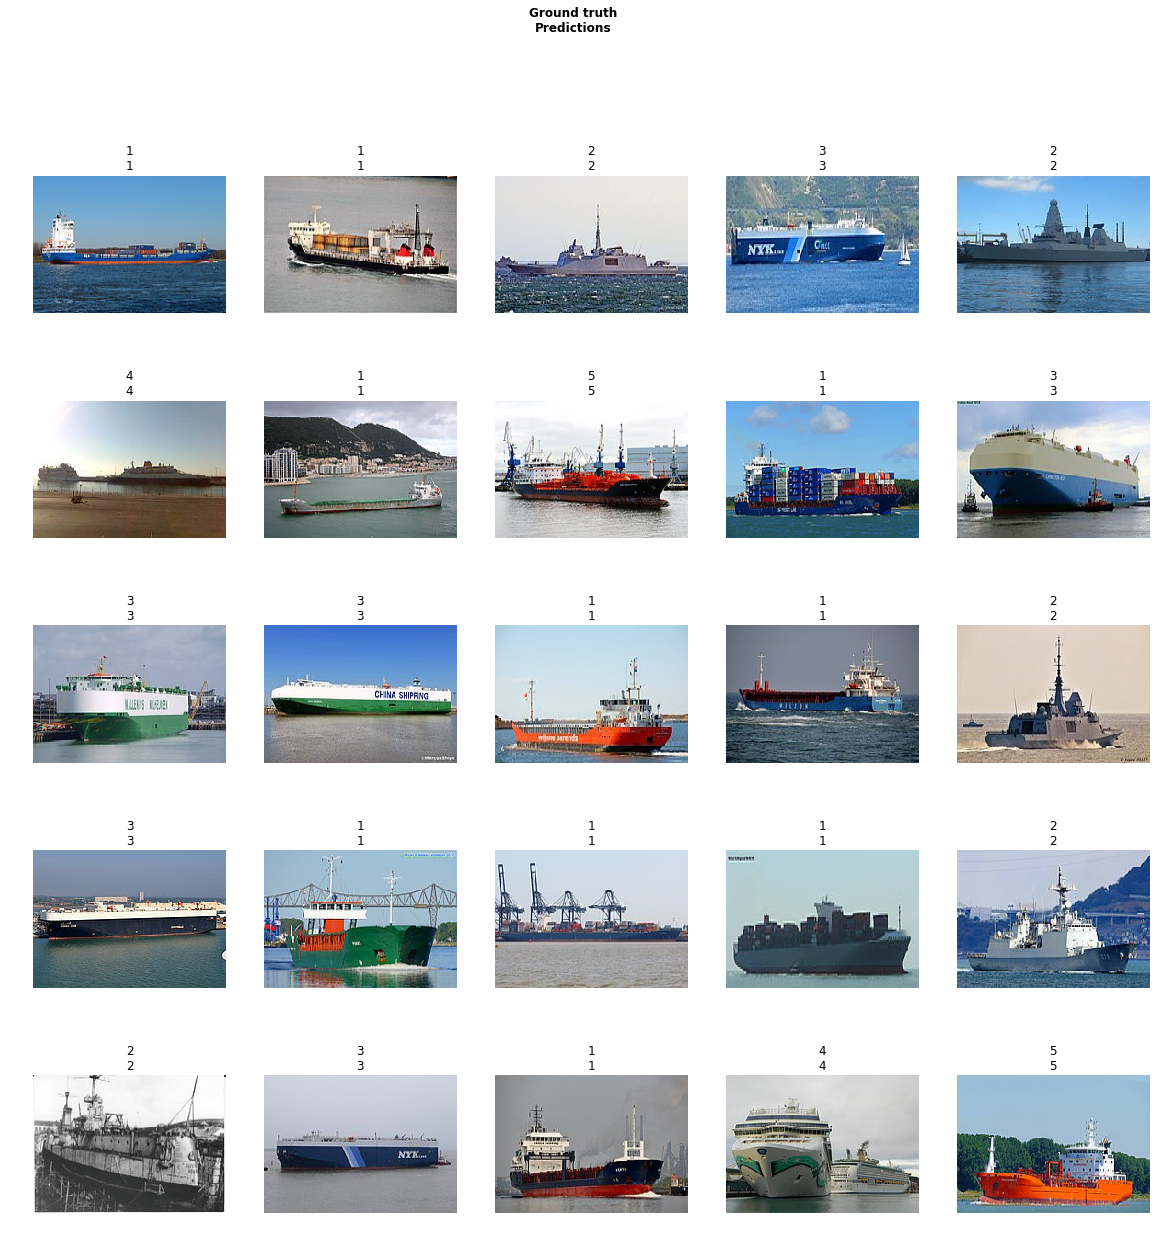

In [139]:
learn.show_results(3)

In [82]:
interp=ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Valid)

In [145]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [83]:
losses,idxs = interp.top_losses()

In [84]:
len(data.valid_ds)==len(losses)==len(idxs)

False

In [153]:
pred_v,y,losses=learn.TTA(ds_type=DatasetType.Valid,with_loss=True)

In [19]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [86]:
test_pred_tta

(tensor([[9.9868e-01, 3.6331e-05, 2.3207e-04, 2.2974e-05, 2.7922e-05],
         [7.6949e-05, 3.8825e-03, 9.9507e-01, 5.1307e-04, 1.3905e-04],
         [4.5433e-01, 1.4982e-01, 6.1538e-03, 1.1470e-01, 2.0358e-01],
         ...,
         [8.3207e-03, 3.8560e-03, 9.3474e-01, 9.5970e-04, 4.5187e-02],
         [1.0982e-03, 9.9700e-01, 4.4465e-05, 3.9727e-04, 1.1131e-04],
         [9.9510e-01, 2.9556e-04, 2.7874e-04, 1.2299e-04, 2.8576e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [20]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 1,  ..., 2, 1, 0])

In [21]:
a=array(preds)

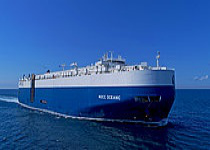

In [89]:
data.test_ds.x[1]

In [22]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [23]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,2
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [92]:
len(submission)

2680

In [24]:
submission.to_csv(PATH/'submission_resnet101_prg_aug.csv',index=False)

In [173]:
PATH.ls()

[PosixPath('data/test_ApKoW4T.csv'),
 PosixPath('data/images'),
 PosixPath('data/models'),
 PosixPath('data/sample_submission_ns2btKE.csv'),
 PosixPath('data/test_resized'),
 PosixPath('data/train.csv'),
 PosixPath('data/train_resized'),
 PosixPath('data/submission_resnet50.csv'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/test'),
 PosixPath('data/rn50-stage3-history.csv'),
 PosixPath('data/rn50-stage1-history.csv'),
 PosixPath('data/rn50-stage4-history.csv'),
 PosixPath('data/rn50-stage2-history.csv')]